# Proyecto: Dataton - Banco Galicia 

#### Descripcion del Desafio

#### Evaluacion 

### Consideraciones

Se entrenara con los datos de Enero-Septiembre y se testeara con los datos de Octubre a Diciembre

## DataSet

En este proyecto, trabajaremos con 3 dataset: pagesviews, device data y conversiones

## Los atributos de pagesviews
A continuación vamos a describir los atributos de cada dataset

* **FEC_EVENT**: Fecha
* **PAGE**: código de la página
* **CONTENT_CATEGORY**: Categoría de la pagina
* **CONTENT_CATEGORY_TOP**: Categoría de mas alto rango para la pagina
* **CONTENT_CATEGORY_BOTTOM**: Categoría de mas bajo rango para la pagina
* **SITE_ID**: id del sitio visitado
* **ON_SITE_SEARCH_TERM**: Palabra clave buscada
* **USER_ID**: Id del usuario

## Los atributos de conversiones
* **mes**
* **anio**
* **USER_ID**: Id del usuario

## Los atributos de device_data
* **FEC_EVENT**: Fecha
* **CONNECTION_SPEED**: Categoría de conexión
* **IS_MOBILE_DEVICE**: Categoría de si es telefono móvil o no
* **USER_ID**: Id del usuario
* **rooms**: cantidad de ambientes



## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las siguientes bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Cargando los dataset 

In [3]:
pagesviews=pd.concat([pd.read_csv('C:/DATATON/pageviews.csv', parse_dates=['FEC_EVENT']),pd.read_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/pageviews_complemento/pageviews_complemento.csv', parse_dates=['FEC_EVENT'])])

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
device_data=pd.read_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/device_data/device_data.csv', parse_dates=['FEC_EVENT'])

In [5]:
conversiones=pd.read_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/conversiones/conversiones.csv', delimiter=',')

## Exploración de datos

### Tamaño de los dataset en registros y atributos

In [6]:
print(pagesviews.shape)
pagesviews.head(3)

(22870354, 8)


,CONTENT_CATEGORY,CONTENT_CATEGORY_BOTTOM,CONTENT_CATEGORY_TOP,FEC_EVENT,ON_SITE_SEARCH_TERM,PAGE,SITE_ID,USER_ID
0,1,1,1,2018-03-30 07:35:48,1,1,1,0
1,2,2,2,2018-03-30 07:35:52,1,2,2,0
2,2,2,2,2018-03-30 07:36:11,1,3,3,0


In [7]:
print(device_data.shape)
device_data.head(3)

(2871406, 4)


,FEC_EVENT,CONNECTION_SPEED,IS_MOBILE_DEVICE,USER_ID
0,2018-11-22 10:15:38,1,1,0.0
1,2018-09-11 09:39:41,1,1,0.0
2,2018-11-29 16:29:03,3,1,0.0


In [8]:
print(conversiones.shape)
conversiones.head(3)

(1738, 3)


,mes,anio,USER_ID
0,7.0,2018.0,1410.0
1,8.0,2018.0,10755.0
2,8.0,2018.0,8270.0


## Identificacion y eliminacion de registros duplicados

In [9]:
pagesviews.columns

Index(['CONTENT_CATEGORY', 'CONTENT_CATEGORY_BOTTOM', 'CONTENT_CATEGORY_TOP',
       'FEC_EVENT', 'ON_SITE_SEARCH_TERM', 'PAGE', 'SITE_ID', 'USER_ID'],
      dtype='object')

In [10]:
#para contabilizar los duplicados 
print(pagesviews.duplicated(subset=None, keep='first').sum())
#para borrarlos
pageviews = pagesviews.drop_duplicates()
#vuelvo a contar
print(pageviews.duplicated(subset=None, keep='first').sum())
print(pageviews.shape)

45769
0
(22824585, 8)


In [11]:
#para contabilizar los duplicados 
print(device_data.duplicated(subset=None, keep='first').sum())
#para borrarlos
device_data = device_data.drop_duplicates()
#vuelvo a contar
print(device_data.duplicated(subset=None, keep='first').sum())
print(device_data.shape)

26979
0
(2844427, 4)


In [12]:
#para contabilizar los duplicados 
print(conversiones.duplicated(subset=None, keep='first').sum())
#para borrarlos
conversiones = conversiones.drop_duplicates()
#vuelvo a contar
print(conversiones.duplicated(subset=None, keep='first').sum())
print(conversiones.shape)

174
0
(1564, 3)


## Observamos el tipo de datos y los modificamos en caso de ser necesario

In [13]:
pageviews.dtypes


CONTENT_CATEGORY                    int64
CONTENT_CATEGORY_BOTTOM             int64
CONTENT_CATEGORY_TOP                int64
FEC_EVENT                  datetime64[ns]
ON_SITE_SEARCH_TERM                 int64
PAGE                                int64
SITE_ID                             int64
USER_ID                             int64
dtype: object

In [14]:
device_data.dtypes

FEC_EVENT           datetime64[ns]
CONNECTION_SPEED             int64
IS_MOBILE_DEVICE             int64
USER_ID                    float64
dtype: object

In [15]:
device_data['USER_ID'] = device_data['USER_ID'].astype('int')
device_data.dtypes

FEC_EVENT           datetime64[ns]
CONNECTION_SPEED             int64
IS_MOBILE_DEVICE             int64
USER_ID                      int32
dtype: object

In [16]:
conversiones.dtypes

mes        float64
anio       float64
USER_ID    float64
dtype: object

In [17]:
conversiones['USER_ID'] = conversiones['USER_ID'].astype('int')
conversiones['mes'] = conversiones['mes'].astype('int')
conversiones['anio'] = conversiones['anio'].astype('int')

In [18]:
conversiones.dtypes

mes        int32
anio       int32
USER_ID    int32
dtype: object

### Dropeo las características que son iguales o se corresponden a una jerarquia

In [19]:
pageviews.drop('CONTENT_CATEGORY', axis=1, inplace=True)

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Creo X_test

In [24]:
pageviews['mes'] = pageviews['FEC_EVENT'].dt.month
pageviews.head(3)

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CONTENT_CATEGORY_BOTTOM,CONTENT_CATEGORY_TOP,FEC_EVENT,ON_SITE_SEARCH_TERM,PAGE,SITE_ID,USER_ID,mes
0,1,1,2018-03-30 07:35:48,1,1,1,0,3
1,2,2,2018-03-30 07:35:52,1,2,2,0,3
2,2,2,2018-03-30 07:36:11,1,3,3,0,3


In [25]:
pageviews.dtypes

CONTENT_CATEGORY_BOTTOM             int64
CONTENT_CATEGORY_TOP                int64
FEC_EVENT                  datetime64[ns]
ON_SITE_SEARCH_TERM                 int64
PAGE                                int64
SITE_ID                             int64
USER_ID                             int64
mes                                 int64
dtype: object

In [26]:
X_test_1 = [] # Primero creamos el objeto vacío

In [27]:
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'CONTENT_CATEGORY_TOP','SITE_ID','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'],axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_1.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_1 = pd.concat(X_test_1, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo PAGE


In [28]:
X_test_1.head()

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,PAGE_1776,PAGE_1777,PAGE_1778,PAGE_1779,PAGE_1780,PAGE_1781,PAGE_1782,PAGE_1783,PAGE_1784,PAGE_1785,PAGE_1786,PAGE_1787,PAGE_1788,PAGE_1789,PAGE_1790,PAGE_1791,PAGE_1792,PAGE_1793,PAGE_1794,PAGE_1795,PAGE_1796,PAGE_1797,PAGE_1798,PAGE_1799,PAGE_1800,PAGE_1801,PAGE_1802,PAGE_1803,PAGE_1804,PAGE_1805,PAGE_1806,PAGE_1807,PAGE_1808,PAGE_1809,PAGE_1810,PAGE_1811,PAGE_1812,PAGE_1813,PAGE_1814,PAGE_1815,PAGE_1816,PAGE_1817,PAGE_1818,PAGE_1819,PAGE_1820,PAGE_1821,PAGE_1822,PAGE_1823,PAGE_1824,PAGE_1825,PAGE_1826,PAGE_1827,PAGE_1828,PAGE_1829,PAGE_1830,PAGE_1831,PAGE_1832,PAGE_1833,PAGE_1834,PAGE_1835
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.028300,0.128440,0.064842,0.043384,0.016949,0.005287,0.000155,0.000155,0.044472,0.114601,0.102472,0.113357,0.022392,0.021303,0.051003,0.001088,0.001866,0.010885,0.000622,0.055668,0.017416,0.002488,0.002488,0.006686,0.005598,0.014928,0.033898,0.000155,0.000155,0.000155,0.000155,0.010574,0.001088,0.000155,0.000155,0.000622,0.000622,0.000622,0.001244,0.000466,0.000155,0.002643,0.000311,0.000933,0.000311,0.000155,0.000466,0.001866,0.004820,0.004509,0.000311,0.000155,0.000155,0.000155,0.001866,0.000155,0.002799,0.000311,0.000311,0.000311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.103742,0.157271,0.065846,0.013738,0.006158,0.003316,0.000000,0.000000,0.054950,0.128375,0.000000,0.091900,0.059687,0.016580,0.050687,0.000000,0.000474,0.091900,0.000947,0.017054,0.038844,0.001421,0.002842,0.000474,0.000474,0.012316,0.006632,0.000000,0.000000,0.000000,0.000000,0.015159,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.001895,0.000000,0.002369,0.000474,0.000000,0.000474,0.000000,0.000000,0.003790,0.000474,0.000474,0.000000,0.000000,0.000000,0.000000,0.000474,0.000000,0.009474,0.001895,0.001421,0.001421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.032517,0.168074,0.114443,0.025760,0.026605,0.002956,0.000000,0.000422,0.027872,0.059966,0.000000,0.000422,0.000845,0.010557,0.015203,0.000000,0.003378,0.000422,0.000000,0.033361,0.074324,0.001689,0.002956,0.003378,0.000000,0.013936,0.023649,0.001267,0.000845,0.000000,0.001267,0.005912,0.000000,0.000422,0.000000,0.000000,0.000000,0.000000,0.018581,0.065456,0.000000,0.012247,0.000422,0.000000,0.000000,0.000000,0.001689,0.003801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001689,0.000000,0.005490,0.023649,0.022804,0.023226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005168,0.192765,0.145736,0.034625,0.040827,0.012920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069767,0.000000,0.000000,0.000000,0.000000,0.001034,0.021189,0.052713,0.000000,0.004651,0.006202,0.001034,0.040827,0.026873,0.000000,0.000517,0.000517,0.001034,0.026357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001550,0.041860,0.001034,0.006202,0.000000,0.001550,0.000000,0.000000,0.0000

In [29]:
X_test_2 = [] # Primero creamos el objeto vacío

In [30]:
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','SITE_ID','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_2.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_2 = pd.concat(X_test_2, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo CONTENT_CATEGORY_TOP


In [31]:
X_test_2.head()

,CONTENT_CATEGORY_TOP_1,CONTENT_CATEGORY_TOP_2,CONTENT_CATEGORY_TOP_3,CONTENT_CATEGORY_TOP_4,CONTENT_CATEGORY_TOP_5,CONTENT_CATEGORY_TOP_6,CONTENT_CATEGORY_TOP_7,CONTENT_CATEGORY_TOP_8,CONTENT_CATEGORY_TOP_9,CONTENT_CATEGORY_TOP_10,CONTENT_CATEGORY_TOP_11,CONTENT_CATEGORY_TOP_12,CONTENT_CATEGORY_TOP_13
USER_ID,,,,,,,,,,,,,
0,0.028767,0.968590,0.000155,0.001710,0.000777,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.105637,0.886310,0.006158,0.001421,0.000474,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.097973,0.830236,0.000422,0.046875,0.021115,0.000000,0.003378,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.048062,0.945220,0.000000,0.006202,0.000517,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.014824,0.967451,0.002256,0.007734,0.006123,0.000322,0.000645,0.0,0.000645,0.0,0.0,0.0,0.0


In [32]:
X_test_3 = [] # Primero creamos el objeto vacío

In [33]:
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_3.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_3 = pd.concat(X_test_3, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo SITE_ID


In [34]:
X_test_3.head()

,SITE_ID_1,SITE_ID_2,SITE_ID_3,SITE_ID_4
USER_ID,,,,
0,0.031410,0.635982,0.332608,0.000000
1,0.113690,0.660351,0.225959,0.000000
2,0.169764,0.320946,0.509291,0.000000
3,0.055297,0.420155,0.523514,0.001034
4,0.032549,0.498872,0.461811,0.006768


In [35]:
X_test_4 = [] # Primero creamos el objeto vacío

In [36]:
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','SITE_ID','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_4.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_4 = pd.concat(X_test_4, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo ON_SITE_SEARCH_TERM


In [37]:
X_test_4.head()

,ON_SITE_SEARCH_TERM_1,ON_SITE_SEARCH_TERM_2,ON_SITE_SEARCH_TERM_3,ON_SITE_SEARCH_TERM_4,ON_SITE_SEARCH_TERM_5,ON_SITE_SEARCH_TERM_6,ON_SITE_SEARCH_TERM_7,ON_SITE_SEARCH_TERM_8,ON_SITE_SEARCH_TERM_9,ON_SITE_SEARCH_TERM_10,ON_SITE_SEARCH_TERM_11,ON_SITE_SEARCH_TERM_12,ON_SITE_SEARCH_TERM_13,ON_SITE_SEARCH_TERM_14,ON_SITE_SEARCH_TERM_15,ON_SITE_SEARCH_TERM_16,ON_SITE_SEARCH_TERM_17,ON_SITE_SEARCH_TERM_18,ON_SITE_SEARCH_TERM_19,ON_SITE_SEARCH_TERM_20,ON_SITE_SEARCH_TERM_21,ON_SITE_SEARCH_TERM_22,ON_SITE_SEARCH_TERM_23,ON_SITE_SEARCH_TERM_24,ON_SITE_SEARCH_TERM_25,ON_SITE_SEARCH_TERM_26,ON_SITE_SEARCH_TERM_27,ON_SITE_SEARCH_TERM_28,ON_SITE_SEARCH_TERM_29,ON_SITE_SEARCH_TERM_30,ON_SITE_SEARCH_TERM_31,ON_SITE_SEARCH_TERM_32,ON_SITE_SEARCH_TERM_33,ON_SITE_SEARCH_TERM_34,ON_SITE_SEARCH_TERM_35,ON_SITE_SEARCH_TERM_36,ON_SITE_SEARCH_TERM_37,ON_SITE_SEARCH_TERM_38,ON_SITE_SEARCH_TERM_39,ON_SITE_SEARCH_TERM_40,ON_SITE_SEARCH_TERM_41,ON_SITE_SEARCH_TERM_42,ON_SITE_SEARCH_TERM_43,ON_SITE_SEARCH_TERM_44,ON_SITE_SEARCH_TERM_45,ON_SITE_SEARCH_TERM_46,ON_SITE_SEARCH_TERM_47,ON_SITE_SEARCH_TERM_48,ON_SITE_SEARCH_TERM_49,ON_SITE_SEARCH_TERM_50,ON_SITE_SEARCH_TERM_51,ON_SITE_SEARCH_TERM_52,ON_SITE_SEARCH_TERM_53,ON_SITE_SEARCH_TERM_54,ON_SITE_SEARCH_TERM_55,ON_SITE_SEARCH_TERM_56,ON_SITE_SEARCH_TERM_57,ON_SITE_SEARCH_TERM_58,ON_SITE_SEARCH_TERM_59,ON_SITE_SEARCH_TERM_60,...,ON_SITE_SEARCH_TERM_235,ON_SITE_SEARCH_TERM_236,ON_SITE_SEARCH_TERM_237,ON_SITE_SEARCH_TERM_238,ON_SITE_SEARCH_TERM_239,ON_SITE_SEARCH_TERM_240,ON_SITE_SEARCH_TERM_241,ON_SITE_SEARCH_TERM_242,ON_SITE_SEARCH_TERM_243,ON_SITE_SEARCH_TERM_244,ON_SITE_SEARCH_TERM_245,ON_SITE_SEARCH_TERM_246,ON_SITE_SEARCH_TERM_247,ON_SITE_SEARCH_TERM_248,ON_SITE_SEARCH_TERM_249,ON_SITE_SEARCH_TERM_250,ON_SITE_SEARCH_TERM_251,ON_SITE_SEARCH_TERM_252,ON_SITE_SEARCH_TERM_253,ON_SITE_SEARCH_TERM_254,ON_SITE_SEARCH_TERM_255,ON_SITE_SEARCH_TERM_256,ON_SITE_SEARCH_TERM_257,ON_SITE_SEARCH_TERM_258,ON_SITE_SEARCH_TERM_259,ON_SITE_SEARCH_TERM_260,ON_SITE_SEARCH_TERM_261,ON_SITE_SEARCH_TERM_262,ON_SITE_SEARCH_TERM_263,ON_SITE_SEARCH_TERM_264,ON_SITE_SEARCH_TERM_265,ON_SITE_SEARCH_TERM_266,ON_SITE_SEARCH_TERM_267,ON_SITE_SEARCH_TERM_268,ON_SITE_SEARCH_TERM_269,ON_SITE_SEARCH_TERM_270,ON_SITE_SEARCH_TERM_271,ON_SITE_SEARCH_TERM_272,ON_SITE_SEARCH_TERM_273,ON_SITE_SEARCH_TERM_274,ON_SITE_SEARCH_TERM_275,ON_SITE_SEARCH_TERM_276,ON_SITE_SEARCH_TERM_277,ON_SITE_SEARCH_TERM_278,ON_SITE_SEARCH_TERM_279,ON_SITE_SEARCH_TERM_280,ON_SITE_SEARCH_TERM_281,ON_SITE_SEARCH_TERM_282,ON_SITE_SEARCH_TERM_283,ON_SITE_SEARCH_TERM_284,ON_SITE_SEARCH_TERM_285,ON_SITE_SEARCH_TERM_286,ON_SITE_SEARCH_TERM_287,ON_SITE_SEARCH_TERM_288,ON_SITE_SEARCH_TERM_289,ON_SITE_SEARCH_TERM_290,ON_SITE_SEARCH_TERM_291,ON_SITE_SEARCH_TERM_292,ON_SITE_SEARCH_TERM_293,ON_SITE_SEARCH_TERM_295
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [38]:
X_test_4_a = [] # Primero creamos el objeto vacío
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','SITE_ID','ON_SITE_SEARCH_TERM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_4_a.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_4_a = pd.concat(X_test_4_a, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo CONTENT_CATEGORY_BOTTOM


In [39]:
X_test_5 = [] # Primero creamos el objeto vacío

In [40]:
for c in pageviews.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews.USER_ID, pageviews[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_5.append(temp.apply(lambda x: x , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_5 = pd.concat(X_test_5, axis=1) # Concatenamos todas las variables en el mismo objeto


haciendo SITE_ID


In [41]:
X_test_5=pd.DataFrame(X_test_5)
X_test_5['Q_views']=X_test_5.SITE_ID_1+X_test_5.SITE_ID_2+X_test_5.SITE_ID_3+X_test_5.SITE_ID_4
X_test_5=X_test_5['Q_views']
X_test_5=pd.DataFrame(X_test_5)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
X_test_5_scal= StandardScaler().fit_transform(X_test_5)

X_test_5=pd.DataFrame(X_test_5_scal)

X_test_5.index.names = ['USER_ID']

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
X_test_5.head()

,0
USER_ID,
0,2.547466
1,0.088880
2,0.235143
3,-0.011285
4,0.653444


In [43]:
#X_test = pd.concat([X_test_1, X_test_2,X_test_3,X_test_4,X_test_5], axis=1)
X_test = pd.concat([X_test_1, X_test_2,X_test_3,X_test_4,X_test_4_a,X_test_5], axis=1)

In [44]:
X_test.shape

(11676, 2110)

In [45]:
X_test=X_test.rename(columns={0:'Q_Views'})

In [46]:
X_test.head()

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_7,CONTENT_CATEGORY_BOTTOM_8,CONTENT_CATEGORY_BOTTOM_9,CONTENT_CATEGORY_BOTTOM_10,CONTENT_CATEGORY_BOTTOM_11,CONTENT_CATEGORY_BOTTOM_12,CONTENT_CATEGORY_BOTTOM_13,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.028300,0.128440,0.064842,0.043384,0.016949,0.005287,0.000155,0.000155,0.044472,0.114601,0.102472,0.113357,0.022392,0.021303,0.051003,0.001088,0.001866,0.010885,0.000622,0.055668,0.017416,0.002488,0.002488,0.006686,0.005598,0.014928,0.033898,0.000155,0.000155,0.000155,0.000155,0.010574,0.001088,0.000155,0.000155,0.000622,0.000622,0.000622,0.001244,0.000466,0.000155,0.002643,0.000311,0.000933,0.000311,0.000155,0.000466,0.001866,0.004820,0.004509,0.000311,0.000155,0.000155,0.000155,0.001866,0.000155,0.002799,0.000311,0.000311,0.000311,...,0.000466,0.000155,0.000155,0.000155,0.000000,0.000000,0.000155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.547466
1,0.103742,0.157271,0.065846,0.013738,0.006158,0.003316,0.000000,0.000000,0.054950,0.128375,0.000000,0.091900,0.059687,0.016580,0.050687,0.000000,0.000474,0.091900,0.000947,0.017054,0.038844,0.001421,0.002842,0.000474,0.000474,0.012316,0.006632,0.000000,0.000000,0.000000,0.000000,0.015159,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.001895,0.000000,0.002369,0.000474,0.000000,0.000474,0.000000,0.000000,0.003790,0.000474,0.000474,0.000000,0.000000,0.000000,0.000000,0.000474,0.000000,0.009474,0.001895,0.001421,0.001421,...,0.000000,0.000000,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003790,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.088880
2,0.0

In [47]:
# SOLO A MODO DE EXPLICACIÖN DEL CODIGO ANTERIOR
# * Podemos ver un ejemplo con PAGE de como se ve la ejecución solo de esta linea, armando la tabla de contingencia y graficando las primeras 5 filas
pd.crosstab(pageviews.USER_ID, pageviews["PAGE"]).head()

PAGE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,...,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,182,826,417,279,109,34,1,1,286,737,659,729,144,137,328,7,12,70,4,358,112,16,16,43,36,96,218,1,1,1,1,68,7,1,1,4,4,4,8,3,1,17,2,6,2,1,3,12,31,29,2,1,1,1,12,1,18,2,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,219,332,139,29,13,7,0,0,116,271,0,194,126,35,107,0,1,194,2,36,82,3,6,1,1,26,14,0,0,0,0,32,0,1,0,0,0,0,0,4,0,5,1,0,1,0,0,8,1,1,0,0,0,0,1,0,20,4,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,77,398,271,61,63,7,0,1,66,142,0,1,2,25,36,0,8,1,0,79,176,4,7,8,0,33,56,3,2,0,3,14,0,1,0,0,0,0,44,155,0,29,1,0,0,0,4,9,0,0,0,0,0,0,4,0,13,56,54,55,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,373,282,67,79,25,0,0,0,0,0,0,0,135,0,0,0,0,2,41,102,0,9,12,2,79,52,0,1,1,2,51,0,0,0,0,0,0,3,81,2,12,0,3,0,0,0,30,0,0,2,1,1,1,9,0,20,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,374,310,27,143,56,0,1,3,548,0,0,0,2,16,0,1,0,1,56,3,24,129,7,6,8,281,0,0,0,3,0,0,0,0,0,0,0,0,13,16,16,18,0,3,0,156,2,4,2,0,0,0,0,5,0,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
X_test_a = [] # Primero creamos el objeto vacío

In [49]:
for c in device_data.drop(["USER_ID", "FEC_EVENT","CONNECTION_SPEED"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data.USER_ID, device_data[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_a.append(temp.apply(lambda x: x/x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_a = pd.concat(X_test_a, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo IS_MOBILE_DEVICE


In [50]:
X_test_a.head()

,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1
USER_ID,,
0,0.000000,1.000000
1,0.102679,0.897321
2,0.384615,0.615385
3,0.016447,0.983553
4,0.976945,0.023055


In [51]:
X_test_a.isnull().sum()

IS_MOBILE_DEVICE_0    0
IS_MOBILE_DEVICE_1    0
dtype: int64

In [52]:
X_test_b = [] # Primero creamos el objeto vacío

In [53]:
for c in device_data.drop(["USER_ID", "FEC_EVENT","IS_MOBILE_DEVICE"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data.USER_ID, device_data[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_b.append(temp.apply(lambda x: x/x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_b = pd.concat(X_test_b, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo CONNECTION_SPEED


In [54]:
X_test_b.head()

,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3
USER_ID,,,,
0,0.010101,0.658249,0.000000,0.331650
1,0.816964,0.129464,0.053571,0.000000
2,0.069597,0.666667,0.120879,0.142857
3,0.003289,0.986842,0.006579,0.003289
4,0.000000,0.645533,0.325648,0.028818


In [55]:
X_test_c = [] # Primero creamos el objeto vacío
for c in device_data.drop(["USER_ID", "FEC_EVENT","CONNECTION_SPEED"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data.USER_ID, device_data[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_test_c.append(temp.apply(lambda x: x , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_test_c = pd.concat(X_test_c, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo IS_MOBILE_DEVICE


In [56]:
X_test_c.head()

,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1
USER_ID,,
0,0,594
1,23,201
2,105,168
3,5,299
4,339,8


In [57]:
X_test_c=pd.DataFrame(X_test_c)
X_test_c['Q_connection']=X_test_c.IS_MOBILE_DEVICE_0+X_test_c.IS_MOBILE_DEVICE_1
X_test_c=X_test_c['Q_connection']
X_test_c=pd.DataFrame(X_test_c)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
X_test_c_scal= StandardScaler().fit_transform(X_test_c)

X_test_c=pd.DataFrame(X_test_c_scal)

X_test_c.index.names = ['USER_ID']

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
X_test_d= pd.merge(X_test,X_test_a,how='left',on=['USER_ID'])

In [59]:
X_test_e= pd.merge(X_test_d,X_test_b,how='left',on=['USER_ID'])

In [60]:
X_test= pd.merge(X_test_e,X_test_c,how='left',on=['USER_ID'])

In [61]:
X_test.head()

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3,0
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.028300,0.128440,0.064842,0.043384,0.016949,0.005287,0.000155,0.000155,0.044472,0.114601,0.102472,0.113357,0.022392,0.021303,0.051003,0.001088,0.001866,0.010885,0.000622,0.055668,0.017416,0.002488,0.002488,0.006686,0.005598,0.014928,0.033898,0.000155,0.000155,0.000155,0.000155,0.010574,0.001088,0.000155,0.000155,0.000622,0.000622,0.000622,0.001244,0.000466,0.000155,0.002643,0.000311,0.000933,0.000311,0.000155,0.000466,0.001866,0.004820,0.004509,0.000311,0.000155,0.000155,0.000155,0.001866,0.000155,0.002799,0.000311,0.000311,0.000311,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.547466,0.000000,1.000000,0.010101,0.658249,0.000000,0.331650,1.546919
1,0.103742,0.157271,0.065846,0.013738,0.006158,0.003316,0.000000,0.000000,0.054950,0.128375,0.000000,0.091900,0.059687,0.016580,0.050687,0.000000,0.000474,0.091900,0.000947,0.017054,0.038844,0.001421,0.002842,0.000474,0.000474,0.012316,0.006632,0.000000,0.000000,0.000000,0.000000,0.015159,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.001895,0.000000,0.002369,0.000474,0.000000,0.000474,0.000000,0.000000,0.003790,0.000474,0.000474,0.000000,0.000000,0.000000,0.000000,0.000474,0.000000,0.009474,0.001895,0.001421,0.001421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003790,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.088880,0.102679,0.897321,0.816964,0.129464,0.053571,0.000000,-0.086590
2,0.032517,0.168074,0.114443,0.025760,0.026605,0.002956,0.000000,0.000422,

In [62]:
X_test.fillna(0)

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3,0
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.028300,0.128440,0.064842,0.043384,0.016949,0.005287,0.000155,0.000155,0.044472,0.114601,0.102472,0.113357,0.022392,0.021303,0.051003,0.001088,0.001866,0.010885,0.000622,0.055668,0.017416,0.002488,0.002488,0.006686,0.005598,0.014928,0.033898,0.000155,0.000155,0.000155,0.000155,0.010574,0.001088,0.000155,0.000155,0.000622,0.000622,0.000622,0.001244,0.000466,0.000155,0.002643,0.000311,0.000933,0.000311,0.000155,0.000466,0.001866,0.004820,0.004509,0.000311,0.000155,0.000155,0.000155,0.001866,0.000155,0.002799,0.000311,0.000311,0.000311,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,2.547466,0.000000,1.000000,0.010101,0.658249,0.000000,0.331650,1.546919
1,0.103742,0.157271,0.065846,0.013738,0.006158,0.003316,0.000000,0.000000,0.054950,0.128375,0.000000,0.091900,0.059687,0.016580,0.050687,0.000000,0.000474,0.091900,0.000947,0.017054,0.038844,0.001421,0.002842,0.000474,0.000474,0.012316,0.006632,0.000000,0.000000,0.000000,0.000000,0.015159,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.001895,0.000000,0.002369,0.000474,0.000000,0.000474,0.000000,0.000000,0.003790,0.000474,0.000474,0.000000,0.000000,0.000000,0.000000,0.000474,0.000000,0.009474,0.001895,0.001421,0.001421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003790,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.088880,0.102679,0.897321,0.816964,0.129464,0.0535

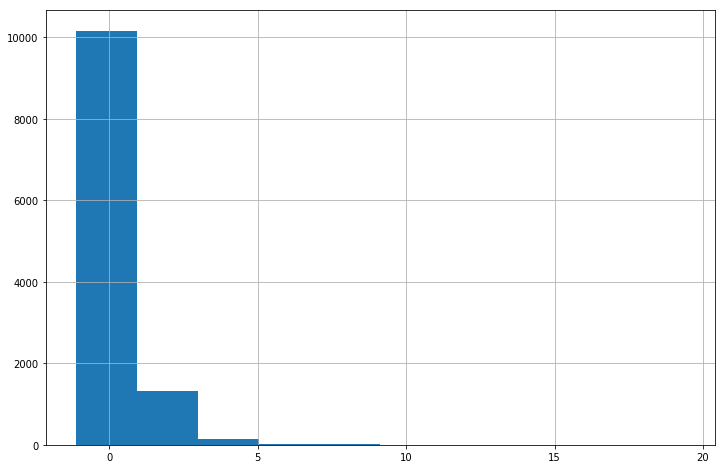

In [63]:
X_test['Q_Views'].hist()

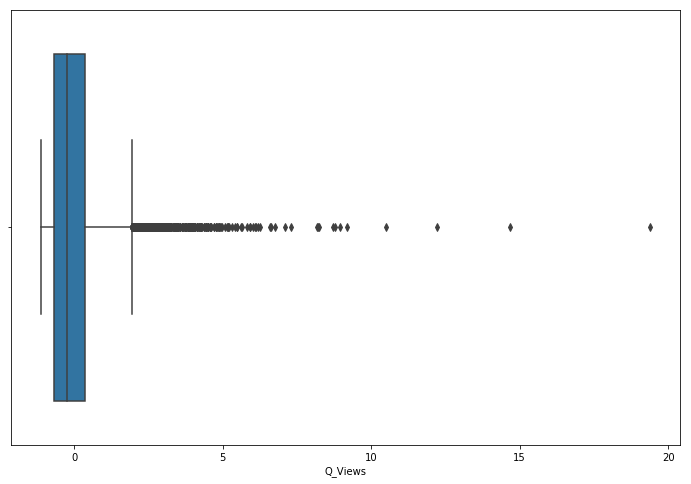

In [64]:
sns.boxplot(X_test.Q_Views)

### Creo X_train

In [65]:
pageviews_1 = pageviews[pageviews.FEC_EVENT.dt.month < 10] # Limitamos los registros a eventos anteriores a Octubre (mes 10)

In [66]:

X_train_1 = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'CONTENT_CATEGORY_TOP','SITE_ID','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_1.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_1 = pd.concat(X_train_1, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo PAGE


In [67]:
X_train_2 = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','SITE_ID','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_2.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_2 = pd.concat(X_train_2, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo CONTENT_CATEGORY_TOP


In [68]:
X_train_3 = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_3.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_3 = pd.concat(X_train_3, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo SITE_ID


In [69]:
X_train_4 = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','SITE_ID','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_4.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_4 = pd.concat(X_train_4, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo ON_SITE_SEARCH_TERM


In [70]:
X_train_4_a = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','SITE_ID','ON_SITE_SEARCH_TERM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_4_a.append(temp.apply(lambda x: x / x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_4_a = pd.concat(X_train_4_a, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo CONTENT_CATEGORY_BOTTOM


In [71]:
X_train_5 = [] # Creo un objeto vacío para Train
for c in pageviews_1.drop(["USER_ID", "FEC_EVENT", "mes",'PAGE','CONTENT_CATEGORY_TOP','ON_SITE_SEARCH_TERM','CONTENT_CATEGORY_BOTTOM'], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(pageviews_1.USER_ID, pageviews_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_5.append(temp.apply(lambda x: x , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_5 = pd.concat(X_train_5, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo SITE_ID


In [72]:
X_train_5=pd.DataFrame(X_train_5)
X_train_5['Q_views']=X_train_5.SITE_ID_1+X_train_5.SITE_ID_2+X_train_5.SITE_ID_3+X_train_5.SITE_ID_4
X_train_5=X_train_5['Q_views']
X_train_5=pd.DataFrame(X_train_5)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
X_train_5_scal= StandardScaler().fit_transform(X_train_5)

X_train_5=pd.DataFrame(X_train_5_scal)

X_train_5.index.names = ['USER_ID']

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
#X_train = pd.concat([X_train_1, X_train_2,X_train_3,X_train_4,X_train_5], axis=1)
X_train = pd.concat([X_train_1, X_train_2,X_train_3,X_train_4,X_train_4_a,X_train_5], axis=1)

In [74]:
X_train.shape

(11614, 1962)

In [75]:
X_train=X_train.rename(columns={0:'Q_Views'})

In [76]:
X_train.head()

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_7,CONTENT_CATEGORY_BOTTOM_8,CONTENT_CATEGORY_BOTTOM_9,CONTENT_CATEGORY_BOTTOM_10,CONTENT_CATEGORY_BOTTOM_11,CONTENT_CATEGORY_BOTTOM_12,CONTENT_CATEGORY_BOTTOM_13,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.037052,0.109324,0.042142,0.020562,0.009161,0.004886,0.000204,0.000204,0.058225,0.150041,0.134161,0.148412,0.029316,0.027891,0.066775,0.001425,0.002443,0.014251,0.000814,0.026059,0.009365,0.003257,0.002850,0.004479,0.003664,0.010179,0.019340,0.000204,0.000204,0.000204,0.000204,0.005293,0.001221,0.000204,0.000204,0.000814,0.000814,0.000814,0.001018,0.000611,0.000204,0.001832,0.000407,0.001221,0.000407,0.000204,0.000611,0.001425,0.00285,0.00285,0.000407,0.000204,0.000204,0.000204,0.000814,0.000204,0.001221,0.000407,0.000407,0.000407,...,0.000611,0.000204,0.000204,0.000204,0.000000,0.000000,0.000204,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.631399
1,0.113219,0.130967,0.033660,0.011016,0.002448,0.001836,0.000000,0.000000,0.070991,0.165851,0.000000,0.118727,0.077111,0.021420,0.065483,0.000000,0.000612,0.118727,0.001224,0.011016,0.013464,0.001836,0.000612,0.000000,0.000000,0.005508,0.002448,0.000000,0.000000,0.000000,0.000000,0.004896,0.000000,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,0.001836,0.000000,0.002448,0.000612,0.000000,0.000612,0.000000,0.000000,0.000612,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001224,0.000612,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003672,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143387
2,0.032615,0.172976,0

In [77]:
device_data_1 = device_data[device_data.FEC_EVENT.dt.month < 10] # Limitamos los registros a eventos anteriores a Octubre (mes 10)
X_train_a = [] # Primero creamos el objeto vacío
for c in device_data_1.drop(["USER_ID", "FEC_EVENT","IS_MOBILE_DEVICE"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data_1.USER_ID, device_data_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_a.append(temp.apply(lambda x: x/x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_a = pd.concat(X_train_a, axis=1) # Concatenamos todas las variables en el mismo objeto

    X_train_a.head()    

haciendo CONNECTION_SPEED


In [78]:
X_train_b = [] # Primero creamos el objeto vacío
for c in device_data_1 .drop(["USER_ID", "FEC_EVENT","CONNECTION_SPEED"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data_1.USER_ID, device_data_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_b.append(temp.apply(lambda x: x/x.sum() , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_b = pd.concat(X_train_b, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo IS_MOBILE_DEVICE


In [79]:
X_train_c = [] # Primero creamos el objeto vacío
for c in device_data_1 .drop(["USER_ID", "FEC_EVENT","CONNECTION_SPEED"], axis=1).columns: # iteramos sobre todas las columnas de "data", menos la fecha y el Id de Usuario
    print("haciendo", c) # Mostramos en que variable está trabajando el loop
    temp = pd.crosstab(device_data_1.USER_ID, device_data_1[c]) # * Realizamos una tabla cruzada de la Variable por Usuario colocando la frecuencia de cada valor posible como columna 
    temp.columns = [c + "_" + str(v) for v in temp.columns] # El nombre de cada columna lo renombramos como: Variable + "_" + Valor de la Variable
    X_train_c.append(temp.apply(lambda x: x , axis=1)) # lambda x: x / x.sum Aplicamos una función lambda para calcular la proporción de frecuencia de cada variable
    X_train_c = pd.concat(X_train_c, axis=1) # Concatenamos todas las variables en el mismo objeto

haciendo IS_MOBILE_DEVICE


In [80]:
X_train_c=pd.DataFrame(X_train_c)
X_train_c['Q_connection']=X_train_c.IS_MOBILE_DEVICE_0+X_train_c.IS_MOBILE_DEVICE_1
X_train_c=X_train_c['Q_connection']
X_train_c=pd.DataFrame(X_train_c)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
X_train_c_scal= StandardScaler().fit_transform(X_train_c)

X_train_c=pd.DataFrame(X_train_c_scal)

X_train_c.index.names = ['USER_ID']

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:

X_train_c.head()

,0
USER_ID,
0,1.794994
1,-0.085935
2,0.115805
3,0.400615
4,0.709158


In [82]:
X_train_d= pd.merge(X_train,X_train_a,how='left',on=['USER_ID'])

In [83]:
X_train_e= pd.merge(X_train_d,X_train_b,how='left',on=['USER_ID'])

In [84]:
X_train= pd.merge(X_train_e,X_train_c,how='left',on=['USER_ID'])

In [85]:
X_train.head()

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1,0
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.037052,0.109324,0.042142,0.020562,0.009161,0.004886,0.000204,0.000204,0.058225,0.150041,0.134161,0.148412,0.029316,0.027891,0.066775,0.001425,0.002443,0.014251,0.000814,0.026059,0.009365,0.003257,0.002850,0.004479,0.003664,0.010179,0.019340,0.000204,0.000204,0.000204,0.000204,0.005293,0.001221,0.000204,0.000204,0.000814,0.000814,0.000814,0.001018,0.000611,0.000204,0.001832,0.000407,0.001221,0.000407,0.000204,0.000611,0.001425,0.00285,0.00285,0.000407,0.000204,0.000204,0.000204,0.000814,0.000204,0.001221,0.000407,0.000407,0.000407,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.631399,0.008299,0.709544,0.000000,0.282158,0.000000,1.000000,1.794994
1,0.113219,0.130967,0.033660,0.011016,0.002448,0.001836,0.000000,0.000000,0.070991,0.165851,0.000000,0.118727,0.077111,0.021420,0.065483,0.000000,0.000612,0.118727,0.001224,0.011016,0.013464,0.001836,0.000612,0.000000,0.000000,0.005508,0.002448,0.000000,0.000000,0.000000,0.000000,0.004896,0.000000,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,0.001836,0.000000,0.002448,0.000612,0.000000,0.000612,0.000000,0.000000,0.000612,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001224,0.000612,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003672,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143387,0.878788,0.084848,0.036364,0.000000,0.084848,0.915152,-0.085935
2,0.032615,0.172976,0.110076,0.022132,0.023879,0.004077,0.000000,0.000000,0.038439,0.08270

In [86]:
X_train.fillna(0)

,PAGE_1,PAGE_2,PAGE_3,PAGE_4,PAGE_5,PAGE_6,PAGE_7,PAGE_8,PAGE_9,PAGE_10,PAGE_11,PAGE_12,PAGE_13,PAGE_14,PAGE_15,PAGE_16,PAGE_17,PAGE_18,PAGE_19,PAGE_20,PAGE_21,PAGE_22,PAGE_23,PAGE_24,PAGE_25,PAGE_26,PAGE_27,PAGE_28,PAGE_29,PAGE_30,PAGE_31,PAGE_32,PAGE_33,PAGE_34,PAGE_35,PAGE_36,PAGE_37,PAGE_38,PAGE_39,PAGE_40,PAGE_41,PAGE_42,PAGE_43,PAGE_44,PAGE_45,PAGE_46,PAGE_47,PAGE_48,PAGE_49,PAGE_50,PAGE_51,PAGE_52,PAGE_53,PAGE_54,PAGE_55,PAGE_56,PAGE_57,PAGE_58,PAGE_59,PAGE_60,...,CONTENT_CATEGORY_BOTTOM_14,CONTENT_CATEGORY_BOTTOM_15,CONTENT_CATEGORY_BOTTOM_16,CONTENT_CATEGORY_BOTTOM_17,CONTENT_CATEGORY_BOTTOM_18,CONTENT_CATEGORY_BOTTOM_19,CONTENT_CATEGORY_BOTTOM_20,CONTENT_CATEGORY_BOTTOM_21,CONTENT_CATEGORY_BOTTOM_22,CONTENT_CATEGORY_BOTTOM_23,CONTENT_CATEGORY_BOTTOM_24,CONTENT_CATEGORY_BOTTOM_25,CONTENT_CATEGORY_BOTTOM_26,CONTENT_CATEGORY_BOTTOM_27,CONTENT_CATEGORY_BOTTOM_28,CONTENT_CATEGORY_BOTTOM_29,CONTENT_CATEGORY_BOTTOM_30,CONTENT_CATEGORY_BOTTOM_31,CONTENT_CATEGORY_BOTTOM_32,CONTENT_CATEGORY_BOTTOM_33,CONTENT_CATEGORY_BOTTOM_34,CONTENT_CATEGORY_BOTTOM_35,CONTENT_CATEGORY_BOTTOM_36,CONTENT_CATEGORY_BOTTOM_37,CONTENT_CATEGORY_BOTTOM_38,CONTENT_CATEGORY_BOTTOM_39,CONTENT_CATEGORY_BOTTOM_40,CONTENT_CATEGORY_BOTTOM_41,CONTENT_CATEGORY_BOTTOM_42,CONTENT_CATEGORY_BOTTOM_43,CONTENT_CATEGORY_BOTTOM_44,CONTENT_CATEGORY_BOTTOM_45,CONTENT_CATEGORY_BOTTOM_46,CONTENT_CATEGORY_BOTTOM_47,CONTENT_CATEGORY_BOTTOM_48,CONTENT_CATEGORY_BOTTOM_49,CONTENT_CATEGORY_BOTTOM_50,CONTENT_CATEGORY_BOTTOM_51,CONTENT_CATEGORY_BOTTOM_52,CONTENT_CATEGORY_BOTTOM_53,CONTENT_CATEGORY_BOTTOM_54,CONTENT_CATEGORY_BOTTOM_55,CONTENT_CATEGORY_BOTTOM_56,CONTENT_CATEGORY_BOTTOM_57,CONTENT_CATEGORY_BOTTOM_58,CONTENT_CATEGORY_BOTTOM_59,CONTENT_CATEGORY_BOTTOM_60,CONTENT_CATEGORY_BOTTOM_61,CONTENT_CATEGORY_BOTTOM_62,CONTENT_CATEGORY_BOTTOM_63,CONTENT_CATEGORY_BOTTOM_64,CONTENT_CATEGORY_BOTTOM_68,Q_Views,CONNECTION_SPEED_0,CONNECTION_SPEED_1,CONNECTION_SPEED_2,CONNECTION_SPEED_3,IS_MOBILE_DEVICE_0,IS_MOBILE_DEVICE_1,0
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.037052,0.109324,0.042142,0.020562,0.009161,0.004886,0.000204,0.000204,0.058225,0.150041,0.134161,0.148412,0.029316,0.027891,0.066775,0.001425,0.002443,0.014251,0.000814,0.026059,0.009365,0.003257,0.002850,0.004479,0.003664,0.010179,0.019340,0.000204,0.000204,0.000204,0.000204,0.005293,0.001221,0.000204,0.000204,0.000814,0.000814,0.000814,0.001018,0.000611,0.000204,0.001832,0.000407,0.001221,0.000407,0.000204,0.000611,0.001425,0.002850,0.002850,0.000407,0.000204,0.000204,0.000204,0.000814,0.000204,0.001221,0.000407,0.000407,0.000407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.631399,0.008299,0.709544,0.000000,0.282158,0.000000,1.000000,1.794994
1,0.113219,0.130967,0.033660,0.011016,0.002448,0.001836,0.000000,0.000000,0.070991,0.165851,0.000000,0.118727,0.077111,0.021420,0.065483,0.000000,0.000612,0.118727,0.001224,0.011016,0.013464,0.001836,0.000612,0.000000,0.000000,0.005508,0.002448,0.000000,0.000000,0.000000,0.000000,0.004896,0.000000,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,0.001836,0.000000,0.002448,0.000612,0.000000,0.000612,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001224,0.000612,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003672,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143387,0.878788,0.084848,0.036364,0.000000,0.084848,0.915152,-0.085935
2,0.032615,0.172976,0.110076,0.02213

In [87]:
X_train=X_train.rename(columns={0:'Q_connection'})

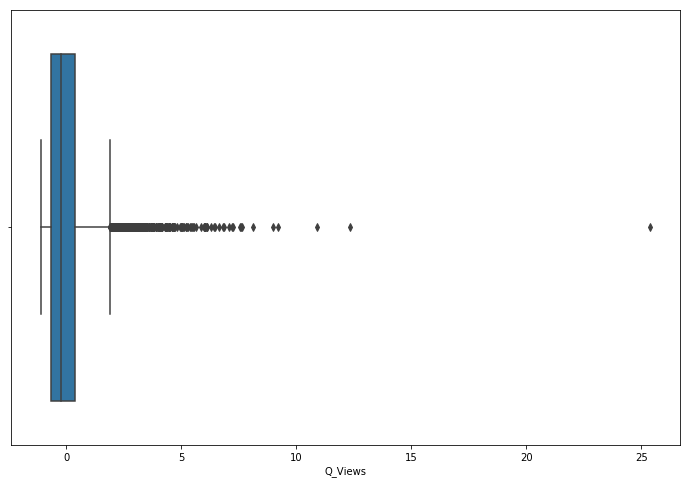

In [88]:
sns.boxplot(X_train.Q_Views)

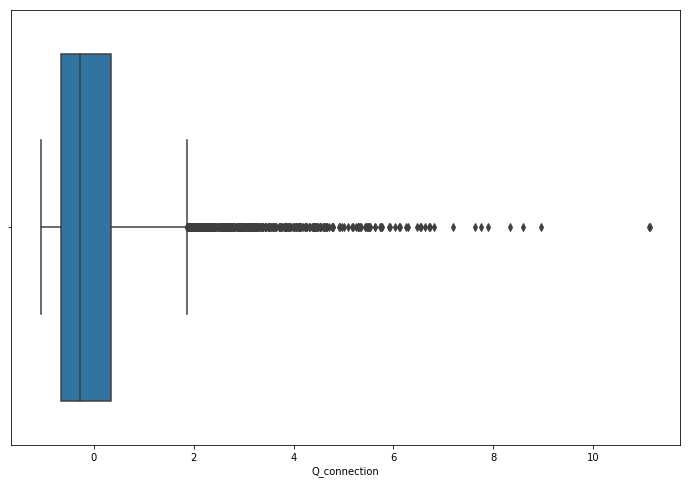

In [89]:
sns.boxplot(X_train.Q_connection)

In [90]:
# Realizar el filtrado intercuartílico en esta celda 
q1 = X_train['Q_Views'].quantile(0.25) 
q3 = X_train['Q_Views'].quantile(0.75) 
iqr = q3 - q1 
vmin = q1 - (iqr * 1.5) 
vmax = q3 + (iqr * 1.5) 
print(q1)
print(q3)
print(iqr)
print(vmin)
print(vmax)

-0.6581196905317915
0.3672933110168849
1.0254130015486764
-2.196239192854806
1.9054128133398995


In [91]:
#cantidad de user por encima del max
df_aux_2 = X_train[X_train['Q_Views'] > 1.9] 
df_aux_2.count().max()

503

In [92]:
#quito los valores extremos y vuelvo al nombre original
X_train = X_train[(X_train["Q_Views"] > vmin) & (X_train["Q_Views"] < vmax)] 
X_train.shape

(11029, 1969)

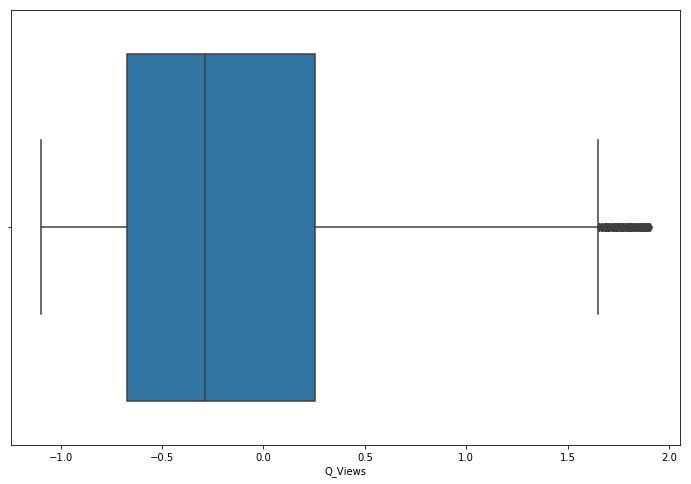

In [93]:
sns.boxplot(X_train.Q_Views)

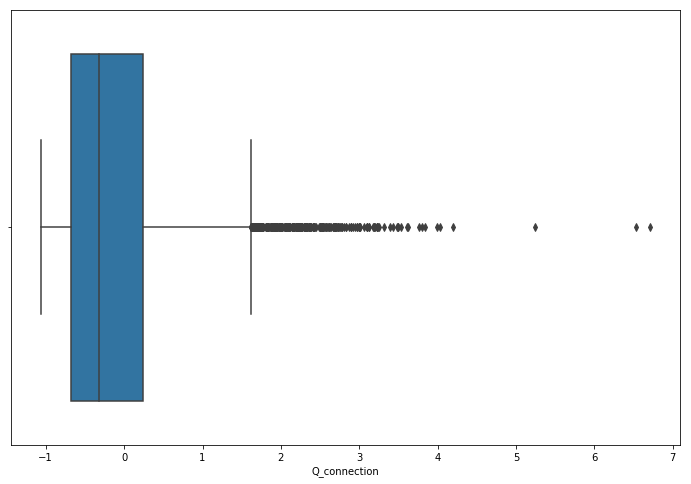

In [94]:
sns.boxplot(X_train.Q_connection)

In [95]:
#sacamos los outliers de connection
# Realizar el filtrado intercuartílico en esta celda 
q1 = X_train['Q_connection'].quantile(0.25) 
q3 = X_train['Q_connection'].quantile(0.75) 
iqr = q3 - q1 
vmin = q1 - (iqr * 1.5) 
vmax = q3 + (iqr * 1.5) 
print(q1)
print(q3)
print(iqr)
print(vmin)
print(vmax)

-0.6792877679352867
0.2404093549920718
0.9196971229273585
-2.0588334523263248
1.6199550393831097


In [96]:
#cantidad de user por encima del max
df_aux_3 = X_train[X_train['Q_connection'] > 1.6] 
df_aux_3.count().max()

362

In [97]:
#quito los valores extremos y vuelvo al nombre original
X_train = X_train[(X_train['Q_connection'] > vmin) & (X_train['Q_connection'] < vmax)] 
X_train.shape

(10674, 1969)

In [145]:
X_train.fillna(0)

,PAGE_101,PAGE_28,PAGE_425,PAGE_1278,PAGE_100,PAGE_1794,PAGE_905,PAGE_995,PAGE_983,PAGE_790,PAGE_446,PAGE_373,PAGE_463,PAGE_493,PAGE_79,PAGE_774,PAGE_549,PAGE_1040,ON_SITE_SEARCH_TERM_57,PAGE_452,PAGE_890,PAGE_1073,PAGE_138,ON_SITE_SEARCH_TERM_243,ON_SITE_SEARCH_TERM_240,ON_SITE_SEARCH_TERM_275,PAGE_707,PAGE_656,PAGE_892,PAGE_131,PAGE_1011,ON_SITE_SEARCH_TERM_222,PAGE_483,PAGE_113,PAGE_874,PAGE_108,PAGE_1097,ON_SITE_SEARCH_TERM_61,PAGE_821,PAGE_1273,PAGE_1272,PAGE_25,PAGE_133,PAGE_191,PAGE_823,PAGE_866,PAGE_1721,PAGE_1123,PAGE_1676,ON_SITE_SEARCH_TERM_187,PAGE_69,PAGE_24,PAGE_1237,ON_SITE_SEARCH_TERM_119,PAGE_1365,PAGE_104,PAGE_584,PAGE_469,PAGE_1437,PAGE_744,...,ON_SITE_SEARCH_TERM_11,PAGE_998,PAGE_747,CONTENT_CATEGORY_BOTTOM_10,PAGE_1198,PAGE_655,PAGE_1284,ON_SITE_SEARCH_TERM_66,PAGE_918,PAGE_10,PAGE_456,PAGE_1098,PAGE_447,PAGE_643,PAGE_1086,PAGE_968,PAGE_224,PAGE_157,ON_SITE_SEARCH_TERM_264,ON_SITE_SEARCH_TERM_76,PAGE_408,PAGE_647,PAGE_1172,PAGE_80,ON_SITE_SEARCH_TERM_191,ON_SITE_SEARCH_TERM_13,PAGE_435,PAGE_1368,PAGE_1419,PAGE_593,PAGE_784,PAGE_1105,PAGE_578,PAGE_1650,ON_SITE_SEARCH_TERM_185,PAGE_81,PAGE_31,PAGE_535,PAGE_957,PAGE_1429,PAGE_197,PAGE_1057,PAGE_44,PAGE_1067,ON_SITE_SEARCH_TERM_103,PAGE_288,PAGE_950,PAGE_976,CONTENT_CATEGORY_BOTTOM_17,ON_SITE_SEARCH_TERM_151,CONTENT_CATEGORY_BOTTOM_40,PAGE_11,PAGE_161,PAGE_1068,ON_SITE_SEARCH_TERM_46,PAGE_231,PAGE_179,PAGE_1371,PAGE_864,PAGE_1138
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000612,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000612,0.0,0.000000,0.0,0.0,0.0,0.165851,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000612,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000612,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000582,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000582,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.005824,0.003494,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.004077,0.0,0.000000,0.0,0.0,0.0,0.082702,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.004077,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.005242,0.000582,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.001747,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000644,0.0,0.0,0.000000,0.000644,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001287,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.005792,0.007079,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.002574,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.014157,0.001287,0.0,0.0,0.0,0.000000,0.0,0.001931,0.0,0.0,0.000644,0.0,0.0,0.000000,0.0,0.0,0.0,0.000644,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.002019,0.000000,0.0,0.0,0.001212,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000808,0.0,0.0,0.0,0.0,0.000000,0.0,0.009693,0.0,0.0,0.000000,0.002019,0.0,0.004443,0.0,0.0,0.0,0.0,0.0,0.000000,0.000808,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.012116,0.000808,0.000000,0.0,0.0,0.005654,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.001212,0.0,0.000000,0.0,0.0

### Ahora que tenemos ambas bases construidas, vamos a filtrarlas quedandonos con las columnas que existen en ambos datasets, para poder entrenar y predecir sobre los mismos atributos.

In [98]:
features = list(set(X_test.columns).intersection(set(X_train.columns))) # Creamos una lista con las columnas que se encuentran en ambos datasets
X_train = X_train[features] # Filtramos en el dataset de Train las columnas que son comunes a ambos
X_test = X_test[features] # Filtramos en el dataset de Test las columnas que son comunes a ambos

In [99]:
X_test.shape

(11676, 1968)

In [100]:
X_train.shape

(10674, 1968)

### Creamos el y_train
 

In [101]:
y_train = pd.Series(0, index=X_train.index) # Creamos un objeto para cada Usuario con valor cero en todos los casos
idx = set(conversiones[conversiones.mes >= 10].USER_ID.unique()).intersection(
        set(X_train.index)) # Buscamos a los Usuarios que hayan convertido de Octubre en adelante
y_train.loc[list(idx)] = 1 # Asignamos el valor "1" a los casos que crucen con el objeto creado antes

In [102]:
y_train.head()

USER_ID
1    0
2    0
3    0
4    0
6    0
dtype: int64

In [103]:
y_train.shape

(10674,)

In [104]:
X_train.shape

(10674, 1968)

In [105]:
X_test.shape

(11676, 1968)

### Creamos el y_test

In [106]:
y_test = pd.Series(0, index=X_test.index) # Creamos un objeto para cada Usuario con valor cero en todos los casos
idx = set(conversiones[conversiones.mes >= 10].USER_ID.unique()).intersection(
        set(X_test.index)) # Buscamos a los Usuarios que hayan convertido 
y_test.loc[list(idx)] = 1 # Asignamos el valor "1" a los casos que crucen con el objeto creado antes

In [107]:
y_test.shape

(11676,)

In [108]:
X_train=pd.DataFrame(X_train)

In [109]:
X_test=pd.DataFrame(X_test)

In [110]:
y_test=pd.DataFrame(y_test)

In [111]:
y_train=pd.DataFrame(y_train)

## Modelado

LightGBM: Gradient Boosting Machine

In [125]:
# conda install -c conda-forge lightgbm: opcional class_weight='balanced'
# n_estimators=500
import lightgbm as lgb

gbm = lgb.LGBMClassifier(n_estimators=1000, min_child_samples=40)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)])

y_pred = gbm.predict(X_test)


C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.126023
[2]	valid_0's binary_logloss: 0.118199
[3]	valid_0's binary_logloss: 0.111883
[4]	valid_0's binary_logloss: 0.107286
[5]	valid_0's binary_logloss: 0.103692
[6]	valid_0's binary_logloss: 0.100885
[7]	valid_0's binary_logloss: 0.0982348
[8]	valid_0's binary_logloss: 0.0961625
[9]	valid_0's binary_logloss: 0.0939796
[10]	valid_0's binary_logloss: 0.0924776
[11]	valid_0's binary_logloss: 0.0908602
[12]	valid_0's binary_logloss: 0.0895911
[13]	valid_0's binary_logloss: 0.0883961
[14]	valid_0's binary_logloss: 0.0871195
[15]	valid_0's binary_logloss: 0.0859107
[16]	valid_0's binary_logloss: 0.0846703
[17]	valid_0's binary_logloss: 0.0836097
[18]	valid_0's binary_logloss: 0.0823696
[19]	valid_0's binary_logloss: 0.0813009
[20]	valid_0's binary_logloss: 0.0803123
[21]	valid_0's binary_logloss: 0.0794038
[22]	valid_0's binary_logloss: 0.0785634
[23]	valid_0's binary_logloss: 0.0778177
[24]	valid_0's binary_logloss: 0.0771644
[25]	valid_0's binary_logloss: 

[201]	valid_0's binary_logloss: 0.0620231
[202]	valid_0's binary_logloss: 0.0621654
[203]	valid_0's binary_logloss: 0.0623318
[204]	valid_0's binary_logloss: 0.0622998
[205]	valid_0's binary_logloss: 0.0625502
[206]	valid_0's binary_logloss: 0.0627984
[207]	valid_0's binary_logloss: 0.0629665
[208]	valid_0's binary_logloss: 0.0629976
[209]	valid_0's binary_logloss: 0.0629813
[210]	valid_0's binary_logloss: 0.0629898
[211]	valid_0's binary_logloss: 0.0630639
[212]	valid_0's binary_logloss: 0.0629876
[213]	valid_0's binary_logloss: 0.0630463
[214]	valid_0's binary_logloss: 0.0631565
[215]	valid_0's binary_logloss: 0.0632241
[216]	valid_0's binary_logloss: 0.0634288
[217]	valid_0's binary_logloss: 0.0634554
[218]	valid_0's binary_logloss: 0.0636806
[219]	valid_0's binary_logloss: 0.0636601
[220]	valid_0's binary_logloss: 0.0637265
[221]	valid_0's binary_logloss: 0.063804
[222]	valid_0's binary_logloss: 0.0638196
[223]	valid_0's binary_logloss: 0.0639628
[224]	valid_0's binary_logloss: 0.0

[397]	valid_0's binary_logloss: 0.0801882
[398]	valid_0's binary_logloss: 0.0803291
[399]	valid_0's binary_logloss: 0.080405
[400]	valid_0's binary_logloss: 0.0805695
[401]	valid_0's binary_logloss: 0.0808224
[402]	valid_0's binary_logloss: 0.0810346
[403]	valid_0's binary_logloss: 0.0810762
[404]	valid_0's binary_logloss: 0.0811412
[405]	valid_0's binary_logloss: 0.0813643
[406]	valid_0's binary_logloss: 0.0813023
[407]	valid_0's binary_logloss: 0.0810412
[408]	valid_0's binary_logloss: 0.0810654
[409]	valid_0's binary_logloss: 0.0812334
[410]	valid_0's binary_logloss: 0.0813906
[411]	valid_0's binary_logloss: 0.0815227
[412]	valid_0's binary_logloss: 0.081634
[413]	valid_0's binary_logloss: 0.0818742
[414]	valid_0's binary_logloss: 0.0819103
[415]	valid_0's binary_logloss: 0.0820733
[416]	valid_0's binary_logloss: 0.0821374
[417]	valid_0's binary_logloss: 0.0823011
[418]	valid_0's binary_logloss: 0.0824047
[419]	valid_0's binary_logloss: 0.0824405
[420]	valid_0's binary_logloss: 0.08

[596]	valid_0's binary_logloss: 0.0914391
[597]	valid_0's binary_logloss: 0.0914228
[598]	valid_0's binary_logloss: 0.0914656
[599]	valid_0's binary_logloss: 0.0914432
[600]	valid_0's binary_logloss: 0.0915325
[601]	valid_0's binary_logloss: 0.091511
[602]	valid_0's binary_logloss: 0.0915263
[603]	valid_0's binary_logloss: 0.0915475
[604]	valid_0's binary_logloss: 0.0915161
[605]	valid_0's binary_logloss: 0.0915227
[606]	valid_0's binary_logloss: 0.0915331
[607]	valid_0's binary_logloss: 0.0916875
[608]	valid_0's binary_logloss: 0.0916951
[609]	valid_0's binary_logloss: 0.0916645
[610]	valid_0's binary_logloss: 0.0916257
[611]	valid_0's binary_logloss: 0.0915615
[612]	valid_0's binary_logloss: 0.0915692
[613]	valid_0's binary_logloss: 0.0915869
[614]	valid_0's binary_logloss: 0.0916077
[615]	valid_0's binary_logloss: 0.0916686
[616]	valid_0's binary_logloss: 0.0917216
[617]	valid_0's binary_logloss: 0.0916809
[618]	valid_0's binary_logloss: 0.091736
[619]	valid_0's binary_logloss: 0.09

[796]	valid_0's binary_logloss: 0.0932274
[797]	valid_0's binary_logloss: 0.0932348
[798]	valid_0's binary_logloss: 0.0932293
[799]	valid_0's binary_logloss: 0.093235
[800]	valid_0's binary_logloss: 0.0932614
[801]	valid_0's binary_logloss: 0.0933093
[802]	valid_0's binary_logloss: 0.0933925
[803]	valid_0's binary_logloss: 0.0933494
[804]	valid_0's binary_logloss: 0.0933428
[805]	valid_0's binary_logloss: 0.093303
[806]	valid_0's binary_logloss: 0.0933121
[807]	valid_0's binary_logloss: 0.0933656
[808]	valid_0's binary_logloss: 0.0933752
[809]	valid_0's binary_logloss: 0.0933437
[810]	valid_0's binary_logloss: 0.093307
[811]	valid_0's binary_logloss: 0.0932865
[812]	valid_0's binary_logloss: 0.0932853
[813]	valid_0's binary_logloss: 0.0933608
[814]	valid_0's binary_logloss: 0.0933484
[815]	valid_0's binary_logloss: 0.093376
[816]	valid_0's binary_logloss: 0.0933771
[817]	valid_0's binary_logloss: 0.0933373
[818]	valid_0's binary_logloss: 0.0933166
[819]	valid_0's binary_logloss: 0.0933

In [118]:
from sklearn import metrics
def Carga_RMSE_train():
        # Initialize 
    rmses_train = []
    for i in range(100,500, 50):
        gbm = lgb.LGBMClassifier(n_estimators=i)
        gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)])
        y_pred_train = gbm.predict(X_train)
        rmses= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmses_train.append(rmses)
    return rmses_train

rmses_train=Carga_RMSE_train()

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[200]	valid_0's binary_logloss: 0.0631884
[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[200]	valid_0's binary_logloss: 0.0631884
[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[200]	valid_0's binary_logloss: 0.0631884
[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.064

[396]	valid_0's binary_logloss: 0.0836716
[397]	valid_0's binary_logloss: 0.0838136
[398]	valid_0's binary_logloss: 0.0837672
[399]	valid_0's binary_logloss: 0.0836506
[400]	valid_0's binary_logloss: 0.0836584


C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

[398]	valid_0's binary_logloss: 0.0837672
[399]	valid_0's binary_logloss: 0.0836506
[400]	valid_0's binary_logloss: 0.0836584
[401]	valid_0's binary_logloss: 0.0836259
[402]	valid_0's binary_logloss: 0.0836502
[403]	valid_0's binary_logloss: 0.0837252
[404]	valid_0's binary_logloss: 0.0838095
[405]	valid_0's binary_logloss: 0.0838472
[406]	valid_0's binary_logloss: 0.0839082
[407]	valid_0's binary_logloss: 0.0840321
[408]	valid_0's binary_logloss: 0.0842511
[409]	valid_0's binary_logloss: 0.0844044
[410]	valid_0's binary_logloss: 0.0844894
[411]	valid_0's binary_logloss: 0.0845327
[412]	valid_0's binary_logloss: 0.084589
[413]	valid_0's binary_logloss: 0.0847321
[414]	valid_0's binary_logloss: 0.0849003
[415]	valid_0's binary_logloss: 0.0850421
[416]	valid_0's binary_logloss: 0.0851709
[417]	valid_0's binary_logloss: 0.0851816
[418]	valid_0's binary_logloss: 0.0852313
[419]	valid_0's binary_logloss: 0.0852161
[420]	valid_0's binary_logloss: 0.0852181
[421]	valid_0's binary_logloss: 0.0

In [119]:
def Carga_RMSE_test():
        # Initialize 
    rmses_test = []
    for i in range(100,500, 50):
        gbm = lgb.LGBMClassifier(n_estimators=i)
        gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)])
        y_pred_test = gbm.predict(X_test)
        rmses= np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        rmses_test.append(rmses)
    return rmses_test

rmses_test=Carga_RMSE_test()

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[200]	valid_0's binary_logloss: 0.0631884
[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

[398]	valid_0's binary_logloss: 0.0837672
[399]	valid_0's binary_logloss: 0.0836506
[400]	valid_0's binary_logloss: 0.0836584


C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.125598
[2]	valid_0's binary_logloss: 0.117026
[3]	valid_0's binary_logloss: 0.111106
[4]	valid_0's binary_logloss: 0.107283
[5]	valid_0's binary_logloss: 0.103515
[6]	valid_0's binary_logloss: 0.0998671
[7]	valid_0's binary_logloss: 0.0976901
[8]	valid_0's binary_logloss: 0.0959144
[9]	valid_0's binary_logloss: 0.0939178
[10]	valid_0's binary_logloss: 0.0921532
[11]	valid_0's binary_logloss: 0.0904091
[12]	valid_0's binary_logloss: 0.0886563
[13]	valid_0's binary_logloss: 0.0872359
[14]	valid_0's binary_logloss: 0.0861859
[15]	valid_0's binary_logloss: 0.085296
[16]	valid_0's binary_logloss: 0.0839566
[17]	valid_0's binary_logloss: 0.0829943
[18]	valid_0's binary_logloss: 0.0822284
[19]	valid_0's binary_logloss: 0.0813894
[20]	valid_0's binary_logloss: 0.080736
[21]	valid_0's binary_logloss: 0.0801615
[22]	valid_0's binary_logloss: 0.0794435
[23]	valid_0's binary_logloss: 0.0788411
[24]	valid_0's binary_logloss: 0.0782586
[25]	valid_0's binary_logloss: 0

[201]	valid_0's binary_logloss: 0.0632736
[202]	valid_0's binary_logloss: 0.0633088
[203]	valid_0's binary_logloss: 0.0634309
[204]	valid_0's binary_logloss: 0.0633852
[205]	valid_0's binary_logloss: 0.0634381
[206]	valid_0's binary_logloss: 0.0634564
[207]	valid_0's binary_logloss: 0.0635858
[208]	valid_0's binary_logloss: 0.0634608
[209]	valid_0's binary_logloss: 0.063478
[210]	valid_0's binary_logloss: 0.0636226
[211]	valid_0's binary_logloss: 0.0636961
[212]	valid_0's binary_logloss: 0.0637427
[213]	valid_0's binary_logloss: 0.0636412
[214]	valid_0's binary_logloss: 0.06376
[215]	valid_0's binary_logloss: 0.0636047
[216]	valid_0's binary_logloss: 0.0638027
[217]	valid_0's binary_logloss: 0.0638904
[218]	valid_0's binary_logloss: 0.0640059
[219]	valid_0's binary_logloss: 0.0640617
[220]	valid_0's binary_logloss: 0.0640467
[221]	valid_0's binary_logloss: 0.0641415
[222]	valid_0's binary_logloss: 0.0642845
[223]	valid_0's binary_logloss: 0.0644989
[224]	valid_0's binary_logloss: 0.064

[398]	valid_0's binary_logloss: 0.0837672
[399]	valid_0's binary_logloss: 0.0836506
[400]	valid_0's binary_logloss: 0.0836584
[401]	valid_0's binary_logloss: 0.0836259
[402]	valid_0's binary_logloss: 0.0836502
[403]	valid_0's binary_logloss: 0.0837252
[404]	valid_0's binary_logloss: 0.0838095
[405]	valid_0's binary_logloss: 0.0838472
[406]	valid_0's binary_logloss: 0.0839082
[407]	valid_0's binary_logloss: 0.0840321
[408]	valid_0's binary_logloss: 0.0842511
[409]	valid_0's binary_logloss: 0.0844044
[410]	valid_0's binary_logloss: 0.0844894
[411]	valid_0's binary_logloss: 0.0845327
[412]	valid_0's binary_logloss: 0.084589
[413]	valid_0's binary_logloss: 0.0847321
[414]	valid_0's binary_logloss: 0.0849003
[415]	valid_0's binary_logloss: 0.0850421
[416]	valid_0's binary_logloss: 0.0851709
[417]	valid_0's binary_logloss: 0.0851816
[418]	valid_0's binary_logloss: 0.0852313
[419]	valid_0's binary_logloss: 0.0852161
[420]	valid_0's binary_logloss: 0.0852181
[421]	valid_0's binary_logloss: 0.0

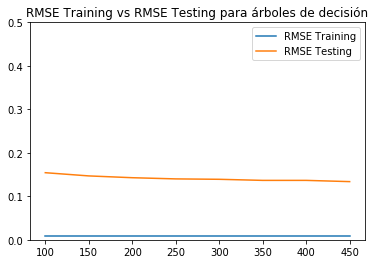

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(100,500, 50), rmses_train, label='RMSE Training')
plt.plot(range(100,500, 50), rmses_test, label='RMSE Testing')
plt.ylim((0,0.5))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

In [ ]:
#accuracy_score(y_test, y_pred)

In [126]:
#Computing Accuracy 
#print("accuracy: ",gbm.score(y_test, y_pred))

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print("confusion matrix: ",confusion_matrix(y_test, y_pred))

# Import precision_score 
from sklearn.metrics import precision_score

# Print the precision_score 
print("precision: ",precision_score(y_test, y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print("recall: ",recall_score(y_test, y_pred))

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print("F1 score: ",f1_score(y_test, y_pred))

# Generate the probabilities
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print("AUC: ",roc_auc_score(y_test, y_pred_prob))

confusion matrix:  [[11285     0]
 [  186   205]]
precision:  1.0
recall:  0.5242966751918159
F1 score:  0.6879194630872484
AUC:  0.9813116793788464


In [114]:
from sklearn.model_selection import cross_val_score
#score 
scores = cross_val_score(gbm, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())
print("Desvío estandar: ", rmse_scores.std())

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Scores:  [0.18857203 0.18391521 0.18391521 0.19085783 0.18391521 0.19085783
 0.18154201 0.18857203 0.18625817 0.186339  ]
Promedio:  0.18647445451024658
Desvío estandar:  0.003021108599850024


In [124]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
# Create the hyperparameter grid
param_grid = {"n_estimators": [100,200,300,400,500,1000],
             "learning_rate": [0.1, 0.2, 0.5],
              "importance_type":['split','gain'],
              "class_weight": ['balanced',None] }

# Call GridSearchCV
grid_search = GridSearchCV(gbm, param_grid)

# Fit the model
grid_search.fit(X_test, y_test)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
#score de error. mientras mas bajos sean los errores mejor
print(grid_search.cv_results_['mean_train_score'])
print(np.sqrt(-grid_search.cv_results_['mean_train_score']))
print(np.sqrt(-grid_search.cv_results_['mean_test_score']))

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

{'class_weight': None, 'importance_type': 'split', 'learning_rate': 0.1, 'n_estimators': 1000}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.97422

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [127]:
feature_importances=pd.DataFrame(gbm.feature_importances_)

In [128]:
feature_importances.head()

,0
0,0
1,24
2,3
3,0
4,8


In [129]:
feature_importances.to_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/caracteristicas_importantes_v11_2.csv')

In [130]:
# Generate the probabilities
y_pred_prob_total = gbm.predict_proba(X_test)
#y_pred_prob_total
y_pred_prob_total=pd.DataFrame(y_pred_prob_total)
y_pred_prob_total=y_pred_prob_total.rename(columns={1:'SCORE'})
y_pred_prob_total.reset_index(inplace=True)
y_pred_prob_total=y_pred_prob_total.rename(columns={'index':'USER_ID'})
y_pred_prob_total.drop(0, axis=1, inplace=True)
#target=pageviews['USER_ID']
# Lo agregamos al df de device
#predict_total = pd.concat([target, y_pred_prob_total], axis=1)
y_pred_prob_total.to_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/gmb_predict_total_v11_2.csv', index=False)

In [131]:
resultados=pd.read_csv('C:/Users/sonia/Documents/Dataton - Banco Galicia - 2019/banco-galicia-dataton-2019/gmb_predict_total_v11_2.csv')

In [132]:
resultados.head()

,USER_ID,SCORE
0,0,2.556684e-08
1,1,1.121820e-08
2,2,1.740525e-08
3,3,2.117029e-09
4,4,1.024864e-04


In [133]:
resultados_positivos=np.where(resultados['SCORE']>0.5)
resultados_positivos=pd.DataFrame(resultados_positivos)
resultados_positivos